## Downloading the Data!

In [1]:
!wget -O final_data.csv https://drive.google.com/uc?id=12tPoclpWZWEZVJx3LsbfGF0QEErcP7YW

--2020-12-10 12:44:06--  https://drive.google.com/uc?id=12tPoclpWZWEZVJx3LsbfGF0QEErcP7YW
Resolving drive.google.com (drive.google.com)... 172.217.169.78, 2a00:1450:4009:81b::200e
Connecting to drive.google.com (drive.google.com)|172.217.169.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rpn0mj8d52jkm5o2b9nvnsb1ti9dir9p/1607604225000/14724987630286451759/*/12tPoclpWZWEZVJx3LsbfGF0QEErcP7YW [following]
--2020-12-10 12:44:08--  https://doc-14-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rpn0mj8d52jkm5o2b9nvnsb1ti9dir9p/1607604225000/14724987630286451759/*/12tPoclpWZWEZVJx3LsbfGF0QEErcP7YW
Resolving doc-14-68-docs.googleusercontent.com (doc-14-68-docs.googleusercontent.com)... 172.217.169.65, 2a00:1450:4009:817::2001
Connecting to doc-14-68-docs.googleusercontent.com (doc-14-68-docs.googleusercontent.com)|172.217.169.65|

## Importing the Libraries!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.stats import ttest_ind

## Reading the data

In [3]:
final_data = pd.read_csv('final_data.csv')

In [4]:
final_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


Converting the 'DATE' column to datetime format. 

In [5]:
final_data['DATE'] = pd.to_datetime(final_data['DATE'])

## Monthly Statistics

In [6]:
total_sales_monthly = final_data.groupby(['STORE_NBR', final_data.DATE.dt.to_period('M')]).sum().unstack('DATE')['TOT_SALES'].dropna()
total_sales_monthly

DATE,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,206.9,176.10,278.8,188.1,192.6,189.6,154.8,225.4,192.9,192.9,221.40,174.1
2,150.8,193.80,154.4,167.8,162.9,136.0,162.8,139.4,192.1,196.5,192.70,156.6
3,1205.7,1079.75,1021.5,1037.9,1008.0,1121.6,1051.7,1197.7,1124.4,920.0,996.90,1037.3
4,1399.9,1259.50,1198.6,1346.4,1212.0,1185.6,1525.0,883.4,1192.4,1230.5,1018.35,1196.0
5,812.0,745.10,896.0,798.0,771.4,879.2,838.0,727.0,681.4,721.8,720.10,910.8
...,...,...,...,...,...,...,...,...,...,...,...,...
268,224.0,322.65,174.4,237.6,225.4,207.3,157.7,165.0,225.0,191.5,245.80,224.7
269,982.0,835.10,886.0,1078.4,967.2,935.4,980.4,955.2,845.8,991.2,900.70,864.4
270,962.8,1003.75,845.4,816.4,965.0,1038.0,1066.6,868.4,991.2,926.4,897.80,912.2


In [7]:
customers_monthly = final_data.groupby(['STORE_NBR', final_data.DATE.dt.to_period('M')]).nunique().unstack('DATE')['LYLTY_CARD_NBR'].dropna()
customers_monthly

DATE,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,49.0,42.0,59.0,44.0,46.0,42.0,35.0,52.0,45.0,42.0,46.0,42.0
2,39.0,39.0,36.0,41.0,39.0,35.0,43.0,29.0,43.0,47.0,48.0,40.0
3,112.0,112.0,102.0,104.0,101.0,111.0,102.0,116.0,109.0,90.0,108.0,105.0
4,128.0,123.0,119.0,123.0,118.0,104.0,134.0,91.0,118.0,116.0,105.0,118.0
5,93.0,97.0,101.0,88.0,85.0,95.0,92.0,87.0,82.0,86.0,84.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,48.0,50.0,31.0,47.0,49.0,42.0,37.0,36.0,46.0,47.0,48.0,38.0
269,103.0,109.0,100.0,111.0,106.0,107.0,110.0,103.0,97.0,109.0,102.0,99.0
270,96.0,122.0,101.0,96.0,101.0,101.0,117.0,94.0,104.0,100.0,98.0,104.0


In [8]:
transactions_per_customer_monthly = final_data.groupby(['STORE_NBR', final_data.DATE.dt.to_period('M')]).count().unstack('DATE')['LYLTY_CARD_NBR'].dropna() / final_data.groupby(['STORE_NBR', final_data.DATE.dt.to_period('M')]).nunique().unstack('DATE')['LYLTY_CARD_NBR'].dropna()
transactions_per_customer_monthly

DATE,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,1.061224,1.023810,1.050847,1.022727,1.021739,1.119048,1.028571,1.057692,1.088889,1.023810,1.108696,1.023810
2,1.051282,1.102564,1.027778,1.048780,1.025641,1.085714,1.046512,1.103448,1.069767,1.042553,1.041667,1.050000
3,1.232143,1.196429,1.166667,1.144231,1.168317,1.162162,1.186275,1.198276,1.192661,1.222222,1.138889,1.161905
4,1.250000,1.227642,1.159664,1.260163,1.177966,1.278846,1.253731,1.120879,1.144068,1.181034,1.200000,1.135593
5,1.290323,1.154639,1.237624,1.215909,1.305882,1.315789,1.282609,1.218391,1.182927,1.267442,1.238095,1.245098
...,...,...,...,...,...,...,...,...,...,...,...,...
268,1.083333,1.080000,1.096774,1.021277,1.040816,1.023810,1.027027,1.027778,1.021739,1.063830,1.083333,1.052632
269,1.349515,1.211009,1.240000,1.333333,1.283019,1.242991,1.309091,1.291262,1.257732,1.275229,1.274510,1.282828
270,1.447917,1.262295,1.247525,1.239583,1.316832,1.475248,1.324786,1.329787,1.375000,1.320000,1.306122,1.221154


In [9]:
chips_per_transaction_monthly = final_data.groupby(['STORE_NBR', final_data.DATE.dt.to_period('M')]).sum().unstack('DATE')['PROD_QTY'].dropna() / final_data.groupby(['STORE_NBR', final_data.DATE.dt.to_period('M')]).count().unstack('DATE')['LYLTY_CARD_NBR'].dropna()
chips_per_transaction_monthly

DATE,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,1.192308,1.255814,1.209677,1.288889,1.212766,1.212766,1.166667,1.181818,1.183673,1.325581,1.294118,1.232558
2,1.121951,1.279070,1.108108,1.046512,1.100000,1.052632,1.088889,1.156250,1.108696,1.142857,1.120000,1.047619
3,1.963768,1.888060,1.949580,1.974790,1.923729,1.976744,1.950413,1.956835,1.961538,1.881818,1.902439,1.950820
4,1.987500,1.920530,2.000000,2.000000,2.000000,2.000000,1.994048,2.000000,2.000000,1.992701,1.809524,2.000000
5,2.000000,1.901786,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.932692,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
268,1.307692,1.629630,1.470588,1.354167,1.313725,1.325581,1.236842,1.270270,1.319149,1.140000,1.288462,1.425000
269,2.000000,1.886364,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.938462,2.000000
270,2.000000,1.876623,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.953125,2.000000


In [10]:
price_per_unit_monthly = final_data.groupby(['STORE_NBR', final_data.DATE.dt.to_period('M')]).sum().unstack('DATE')['TOT_SALES'].dropna() / final_data.groupby(['STORE_NBR', final_data.DATE.dt.to_period('M')]).sum().unstack('DATE')['PROD_QTY'].dropna()
price_per_unit_monthly

DATE,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,3.337097,3.261111,3.717333,3.243103,3.378947,3.326316,3.685714,3.467692,3.325862,3.384211,3.354545,3.284906
2,3.278261,3.523636,3.765854,3.728889,3.702273,3.400000,3.322449,3.767568,3.766667,3.508929,3.441071,3.559091
3,4.449077,4.267787,4.403017,4.416596,4.440529,4.398431,4.456356,4.403309,4.409412,4.444444,4.260256,4.358403
4,4.402201,4.343103,4.342754,4.343226,4.359712,4.457143,4.552239,4.330392,4.416296,4.507326,4.466447,4.462687
5,3.383333,3.498122,3.584000,3.728972,3.474775,3.516800,3.550847,3.429245,3.512371,3.311009,3.582587,3.585827
...,...,...,...,...,...,...,...,...,...,...,...,...
268,3.294118,3.666477,3.488000,3.655385,3.364179,3.636842,3.355319,3.510638,3.629032,3.359649,3.668657,3.942105
269,3.532374,3.353815,3.572581,3.643243,3.555882,3.516541,3.404167,3.590977,3.466393,3.565468,3.574206,3.403150
270,3.463309,3.473183,3.354762,3.430252,3.627820,3.483221,3.440645,3.473600,3.465734,3.509091,3.591200,3.591339


## Correlation between the Trial Stores and the Others

In [11]:
def correlate(measure):
    tempList = []
    for index, row in measure[(measure.index != 77) & (measure.index != 86) & (measure.index != 88)].iloc[:, 0:7].iterrows():
        for trial_store in [77, 86, 88]:
            tempList.append([trial_store, index, measure[price_per_unit_monthly.index == trial_store].iloc[0, 0:7].corr(row)]) 
    return pd.DataFrame(tempList, columns = ['TRIAL_STORE_NBR', 'PTNL_CONTROL_STORE_NBR', 'CORRELATION']).pivot(index='PTNL_CONTROL_STORE_NBR', columns='TRIAL_STORE_NBR', values='CORRELATION') 

def magnitude(measure):
    tempList = []
    for index, row in measure[(measure.index != 77) & (measure.index != 86) & (measure.index != 88)].iloc[:, 0:7].iterrows():
        for trial_store in [77, 86, 88]:
            absoluteDiff = measure[price_per_unit_monthly.index == trial_store].iloc[0, 0:7] - row
            standardDiff = 1 - (absoluteDiff.subtract(absoluteDiff.min()).divide(absoluteDiff.max() - absoluteDiff.min()))
            tempList.append([trial_store, index, standardDiff.mean()]) 
    return pd.DataFrame(tempList, columns = ['TRIAL_STORE_NBR', 'PTNL_CONTROL_STORE_NBR', 'CORRELATION']).pivot(index='PTNL_CONTROL_STORE_NBR', columns='TRIAL_STORE_NBR', values='CORRELATION') 

In [12]:
total_sales_monthly_correlation = correlate(total_sales_monthly)
customers_monthly_correlation = correlate(customers_monthly)

total_sales_monthly_magnitude = magnitude(total_sales_monthly)
customers_monthly_magnitude = magnitude(customers_monthly)

In [13]:
total_sales_monthly_corr = (total_sales_monthly_correlation + total_sales_monthly_magnitude)/2
customers_monthly_corr = (customers_monthly_correlation + customers_monthly_magnitude)/2

final_corr = (total_sales_monthly_corr + customers_monthly_corr)/2

print('FOR STORE - 77')
print(final_corr.iloc[:, 0].sort_values(ascending=False)[:1])

print('----------------------------')
 
print('FOR STORE - 86')
print(final_corr.iloc[:, 1].sort_values(ascending=False)[:1])

print('----------------------------')

print('FOR STORE - 88')
print(final_corr.iloc[:, 2].sort_values(ascending=False)[:1])

print('----------------------------')

FOR STORE - 77
PTNL_CONTROL_STORE_NBR
119    0.742578
Name: 77, dtype: float64
----------------------------
FOR STORE - 86
PTNL_CONTROL_STORE_NBR
155    0.702203
Name: 86, dtype: float64
----------------------------
FOR STORE - 88
PTNL_CONTROL_STORE_NBR
178    0.679316
Name: 88, dtype: float64
----------------------------


## Calculating Scale Factor for the Control Stores

### For Total Sales

In [14]:
scale_factor_sales_77 = (total_sales_monthly[total_sales_monthly.index == 77].iloc[:, 0:7].sum() / total_sales_monthly[total_sales_monthly.index == 119].iloc[:, 0:7].sum()).mean()
scale_factor_sales_86 = (total_sales_monthly[total_sales_monthly.index == 86].iloc[:, 0:7].sum() / total_sales_monthly[total_sales_monthly.index == 155].iloc[:, 0:7].sum()).mean()
scale_factor_sales_88 = (total_sales_monthly[total_sales_monthly.index == 88].iloc[:, 0:7].sum() / total_sales_monthly[total_sales_monthly.index == 178].iloc[:, 0:7].sum()).mean()

### For Number of Customers

In [15]:
scale_factor_customers_77 = (customers_monthly[customers_monthly.index == 77].iloc[:, 0:7].sum() / customers_monthly[customers_monthly.index == 119].iloc[:, 0:7].sum()).mean()
scale_factor_customers_86 = (customers_monthly[customers_monthly.index == 86].iloc[:, 0:7].sum() / customers_monthly[customers_monthly.index == 155].iloc[:, 0:7].sum()).mean()
scale_factor_customers_88 = (customers_monthly[customers_monthly.index == 88].iloc[:, 0:7].sum() / customers_monthly[customers_monthly.index == 178].iloc[:, 0:7].sum()).mean()

## Visualizing the trend for the Pre - Trial Period between the Trial Stores and the Control Stores

### For Total Sales

Text(0.5, 1.0, 'Trend in Total Sales')

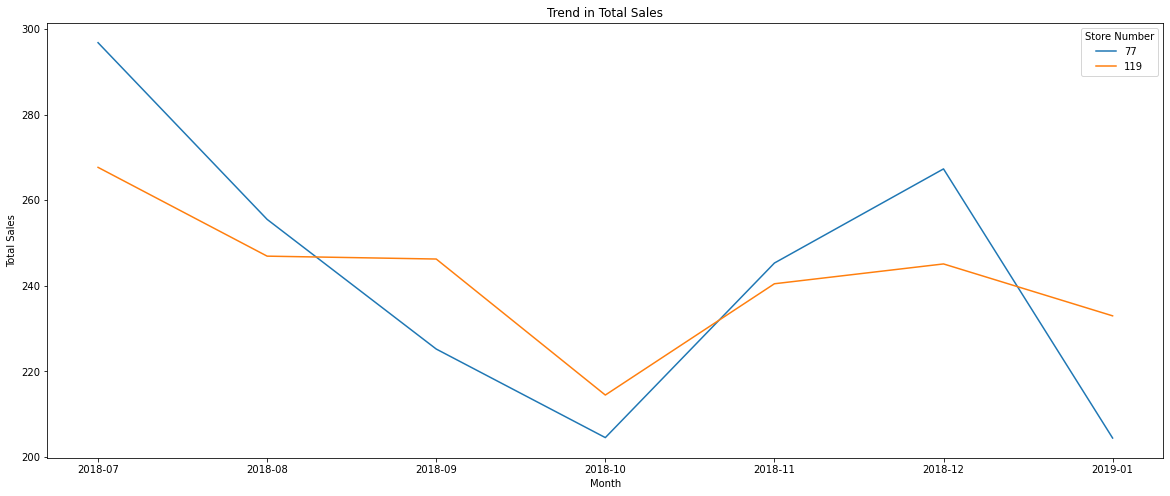

In [16]:
plt.plot(total_sales_monthly.columns[0:7].astype(str), total_sales_monthly[total_sales_monthly.index == 77].iloc[:, 0:7].T, label='77')
plt.plot(total_sales_monthly.columns[0:7].astype(str), total_sales_monthly[total_sales_monthly.index == 119].iloc[:, 0:7].multiply(scale_factor_sales_77).T, label='119')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend(title='Store Number')
plt.title('Trend in Total Sales')

Text(0.5, 1.0, 'Trend in Total Sales')

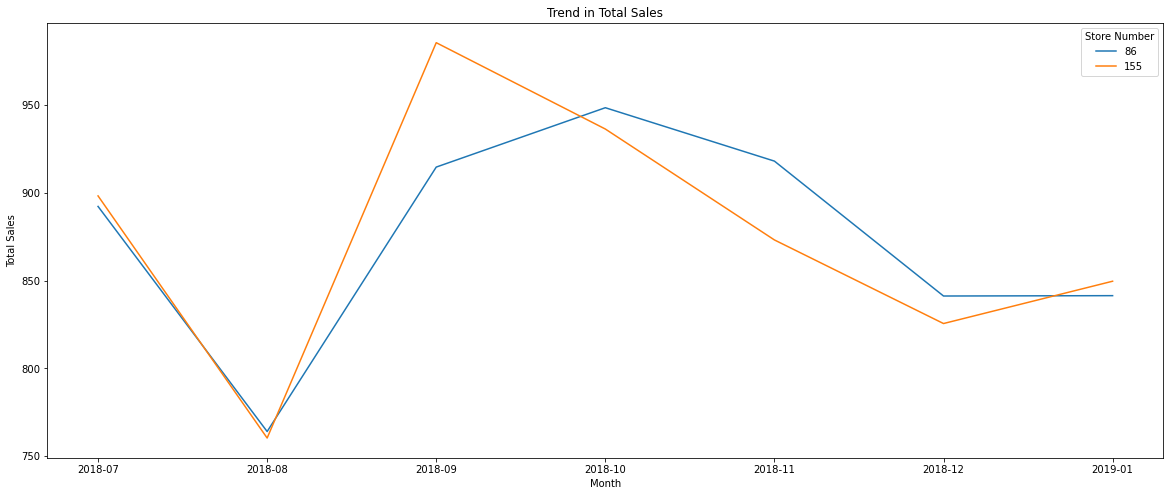

In [17]:
plt.plot(total_sales_monthly.columns[0:7].astype(str), total_sales_monthly[total_sales_monthly.index == 86].iloc[:, 0:7].T, label='86')
plt.plot(total_sales_monthly.columns[0:7].astype(str), total_sales_monthly[total_sales_monthly.index == 155].iloc[:, 0:7].multiply(scale_factor_sales_86).T, label='155')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend(title='Store Number')
plt.title('Trend in Total Sales')

Text(0.5, 1.0, 'Trend in Total Sales')

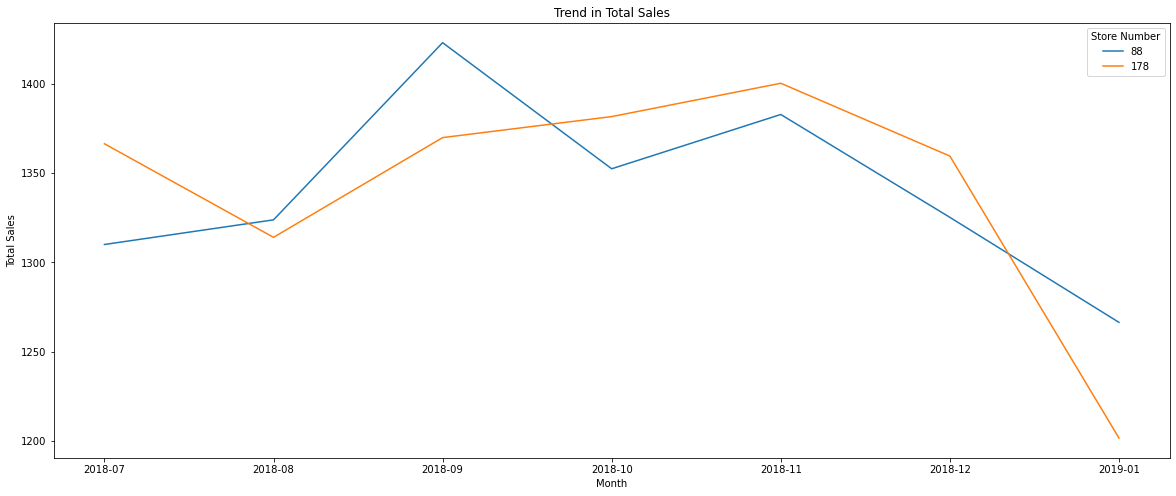

In [18]:
plt.plot(total_sales_monthly.columns[0:7].astype(str), total_sales_monthly[total_sales_monthly.index == 88].iloc[:, 0:7].T, label='88')
plt.plot(total_sales_monthly.columns[0:7].astype(str), total_sales_monthly[total_sales_monthly.index == 178].iloc[:, 0:7].multiply(scale_factor_sales_88).T, label='178')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend(title='Store Number')
plt.title('Trend in Total Sales')

### For Number of Customers

Text(0.5, 1.0, 'Trend in Number of Customers')

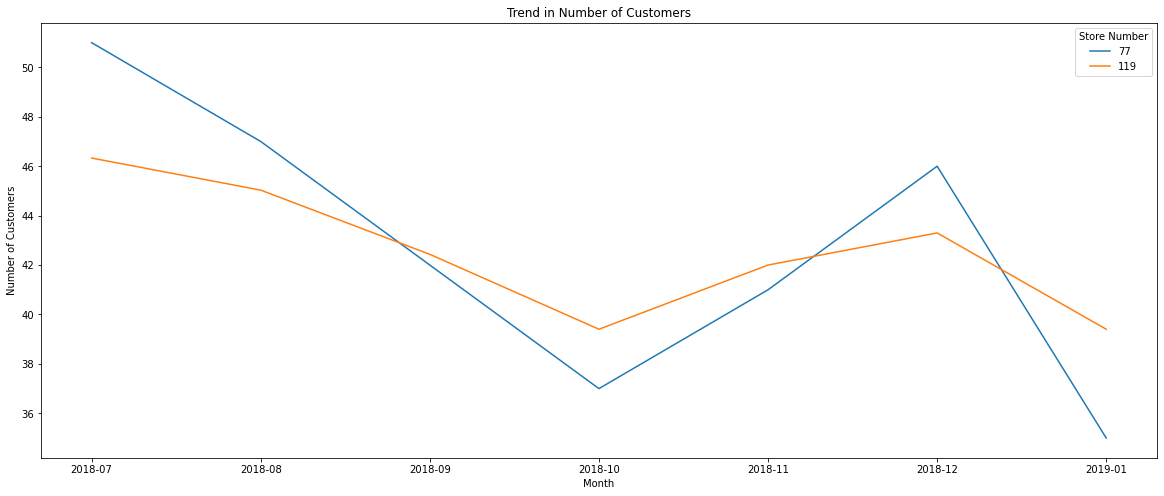

In [19]:
plt.plot(customers_monthly.columns[0:7].astype(str), customers_monthly[customers_monthly.index == 77].iloc[:, 0:7].T, label='77')
plt.plot(customers_monthly.columns[0:7].astype(str), customers_monthly[customers_monthly.index == 119].iloc[:, 0:7].multiply(scale_factor_customers_77).T, label='119')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.xlabel('Month')
plt.legend(title='Store Number')
plt.title('Trend in Number of Customers')

Text(0.5, 1.0, 'Trend in Number of Customers')

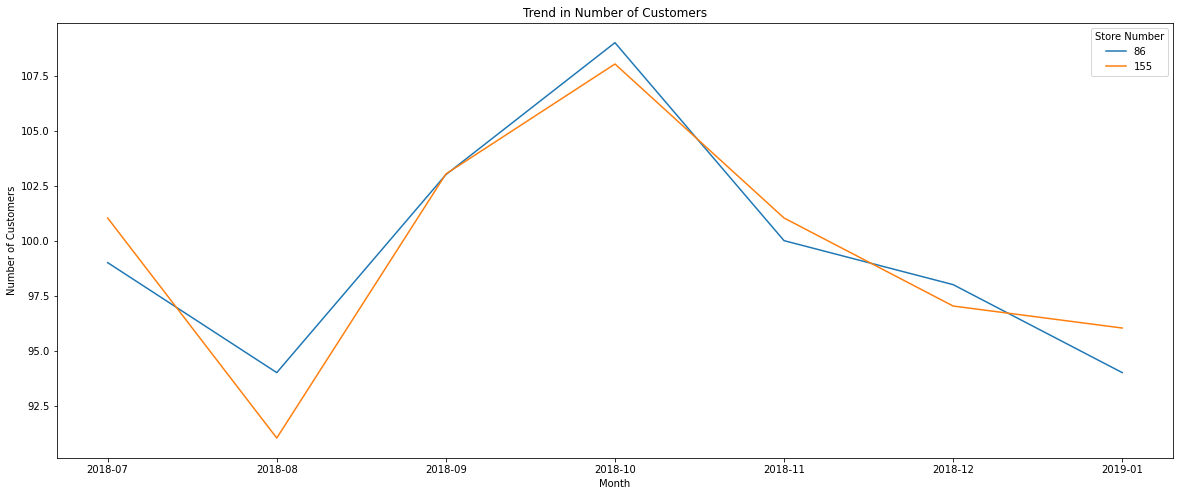

In [20]:
plt.plot(customers_monthly.columns[0:7].astype(str), customers_monthly[customers_monthly.index == 86].iloc[:, 0:7].T, label='86')
plt.plot(customers_monthly.columns[0:7].astype(str), customers_monthly[customers_monthly.index == 155].iloc[:, 0:7].multiply(scale_factor_customers_86).T, label='155')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.xlabel('Month')
plt.legend(title='Store Number')
plt.title('Trend in Number of Customers')

Text(0.5, 1.0, 'Trend in Number of Customers')

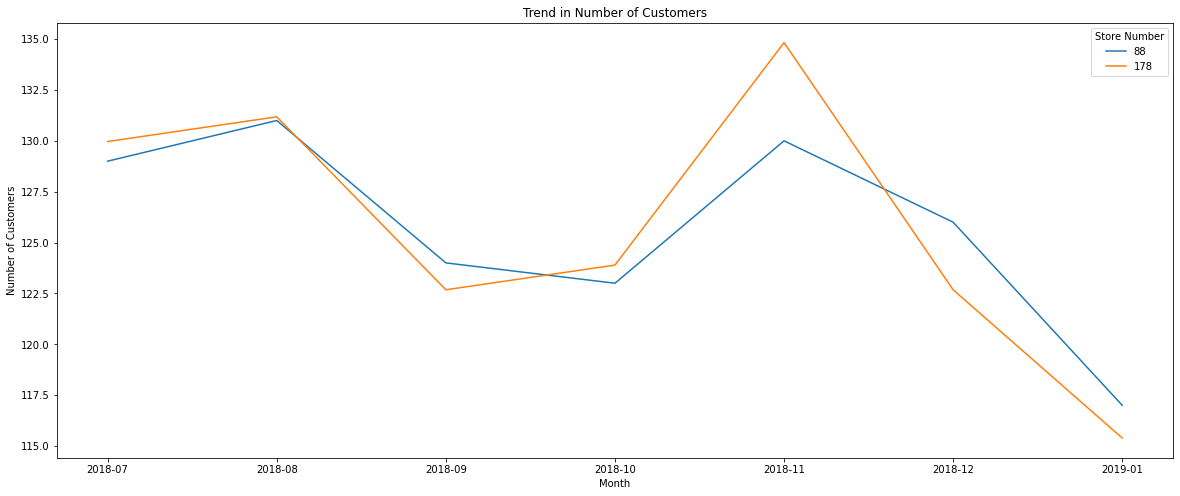

In [21]:
plt.plot(customers_monthly.columns[0:7].astype(str), customers_monthly[customers_monthly.index == 88].iloc[:, 0:7].T, label='88')
plt.plot(customers_monthly.columns[0:7].astype(str), customers_monthly[customers_monthly.index == 178].iloc[:, 0:7].multiply(scale_factor_customers_88).T, label='178')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.xlabel('Month')
plt.legend(title='Store Number')
plt.title('Trend in Number of Customers')

## Percentage Difference during the Trial Period between the Control and the Trial Stores

### Total Sales

In [22]:
print('For Store - 77')
print(100*((total_sales_monthly[total_sales_monthly.index == 77].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_sales_77).values)).divide(total_sales_monthly[total_sales_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_sales_77).values)).values)

print('-------------------------')

print('For Store - 86')
print(100*((total_sales_monthly[total_sales_monthly.index == 86].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_sales_86).values)).divide(total_sales_monthly[total_sales_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_sales_86).values)).values)

print('-------------------------')

print('For Store - 88')
print(100*((total_sales_monthly[total_sales_monthly.index == 88].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_sales_88).values)).divide(total_sales_monthly[total_sales_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_sales_88).values)).values)

print('-------------------------')

For Store - 77
[[-6.07433553 14.34033515 20.31567614]]
-------------------------
For Store - 86
[[ 5.48158912 31.40132275  3.37919118]]
-------------------------
For Store - 88
[[-12.32137231   3.04303888  -5.3729119 ]]
-------------------------


### Number of Customers

In [23]:
print('For Store - 77')
print(100*((customers_monthly[customers_monthly.index == 77].iloc[:, 7:10].subtract(customers_monthly[customers_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_customers_77).values)).divide(customers_monthly[customers_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_customers_77).values)).values)

print('-------------------------')

print('For Store - 86')
print(100*((customers_monthly[customers_monthly.index == 86].iloc[:, 7:10].subtract(customers_monthly[customers_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_customers_86).values)).divide(customers_monthly[customers_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_customers_86).values)).values)

print('-------------------------')

print('For Store - 88')
print(100*((customers_monthly[customers_monthly.index == 88].iloc[:, 7:10].subtract(customers_monthly[customers_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_customers_88).values)).divide(customers_monthly[customers_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_customers_88).values)).values)

print('-------------------------')

For Store - 77
[[ 4.97518978 19.04402965 27.69923087]]
-------------------------
For Store - 86
[[12.59941948 22.30549391  6.03032279]]
-------------------------
For Store - 88
[[-4.59045197 -3.22707274 -9.93044045]]
-------------------------


## Hypothesis Testing

### For Total Sales

### Sample Mean

In [24]:
sample_mean_77 = 100*((total_sales_monthly[total_sales_monthly.index == 77].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_sales_77).values)).divide(total_sales_monthly[total_sales_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_sales_77).values)).values.mean()
sample_mean_86 = 100*((total_sales_monthly[total_sales_monthly.index == 86].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_sales_86).values)).divide(total_sales_monthly[total_sales_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_sales_86).values)).values.mean()
sample_mean_88 = 100*((total_sales_monthly[total_sales_monthly.index == 88].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_sales_88).values)).divide(total_sales_monthly[total_sales_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_sales_88).values)).values.mean()

### Population Mean

In [25]:
population_mean_77 = 100*((total_sales_monthly[total_sales_monthly.index == 77].subtract(total_sales_monthly[total_sales_monthly.index == 119].multiply(scale_factor_sales_77).values)).divide(total_sales_monthly[total_sales_monthly.index == 119].multiply(scale_factor_sales_77).values)).values.mean()
population_mean_86 = 100*((total_sales_monthly[total_sales_monthly.index == 86].subtract(total_sales_monthly[total_sales_monthly.index == 155].multiply(scale_factor_sales_86).values)).divide(total_sales_monthly[total_sales_monthly.index == 155].multiply(scale_factor_sales_86).values)).values.mean()
population_mean_88 = 100*((total_sales_monthly[total_sales_monthly.index == 88].subtract(total_sales_monthly[total_sales_monthly.index == 178].multiply(scale_factor_sales_88).values)).divide(total_sales_monthly[total_sales_monthly.index == 178].multiply(scale_factor_sales_88).values)).values.mean()

### Standard Deviation of the Sample

In [26]:
sample_std_77 = (((total_sales_monthly[total_sales_monthly.index == 77].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_sales_77).values)).divide(total_sales_monthly[total_sales_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_sales_77).values)).values.std())/sqrt(3)
sample_std_86 = (((total_sales_monthly[total_sales_monthly.index == 86].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_sales_86).values)).divide(total_sales_monthly[total_sales_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_sales_86).values)).values.std())/sqrt(3)
sample_std_88 = (((total_sales_monthly[total_sales_monthly.index == 88].iloc[:, 7:10].subtract(total_sales_monthly[total_sales_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_sales_88).values)).divide(total_sales_monthly[total_sales_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_sales_88).values)).values.std())/sqrt(3)

### t - Values

In [27]:
print('For Store-77, the t-value is: ')
print((sample_mean_77 - population_mean_77)/sample_std_77)

print('------------------------------')

print('For Store-86, the t-value is: ')
print((sample_mean_86 - population_mean_86)/sample_std_86)

print('------------------------------')

print('For Store-88, the t-value is: ')
print((sample_mean_88 - population_mean_88)/sample_std_88)

print('------------------------------')

For Store-77, the t-value is: 
19.134753882267464
------------------------------
For Store-86, the t-value is: 
137.0001280961164
------------------------------
For Store-88, the t-value is: 
-177.39207379551047
------------------------------


The t-distribution for the 95th percentage for degree of freedom = 2 is 2.919986. We can see that the t-value for the stores 77 and 86 are significantly greater than the t-distribution. Visualizing the above. 

Text(0.5, 1.0, 'Trend in Total Sales')

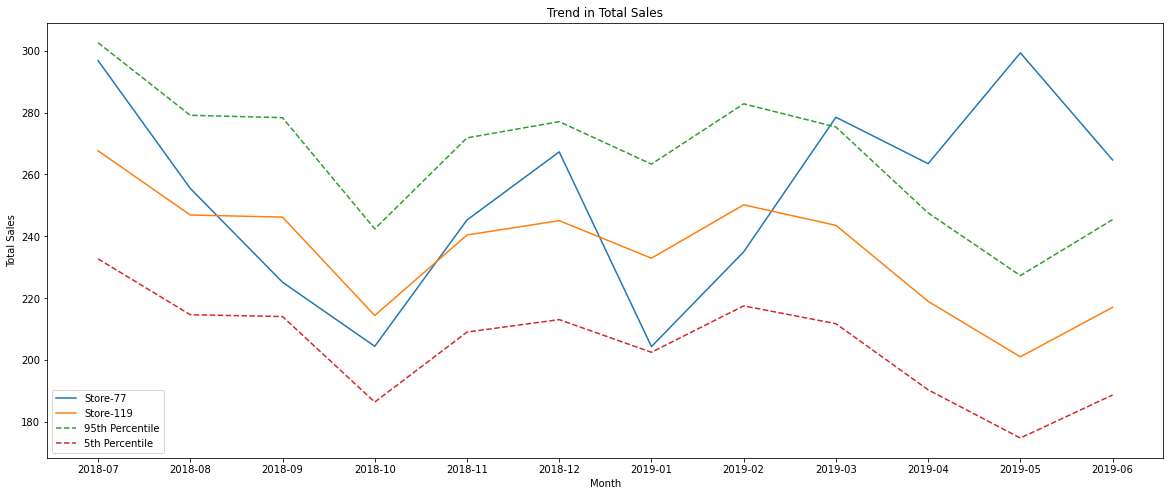

In [28]:
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 77].T, label='Store-77')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 119].multiply(scale_factor_sales_77).T, label='Store-119')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 119].multiply(scale_factor_sales_77).T*(1 + sample_std_77 * 2), '--', label='95th Percentile')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 119].multiply(scale_factor_sales_77).T*(1 - sample_std_77 * 2), '--', label='5th Percentile')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend()
plt.title('Trend in Total Sales')

Text(0.5, 1.0, 'Trend in Total Sales')

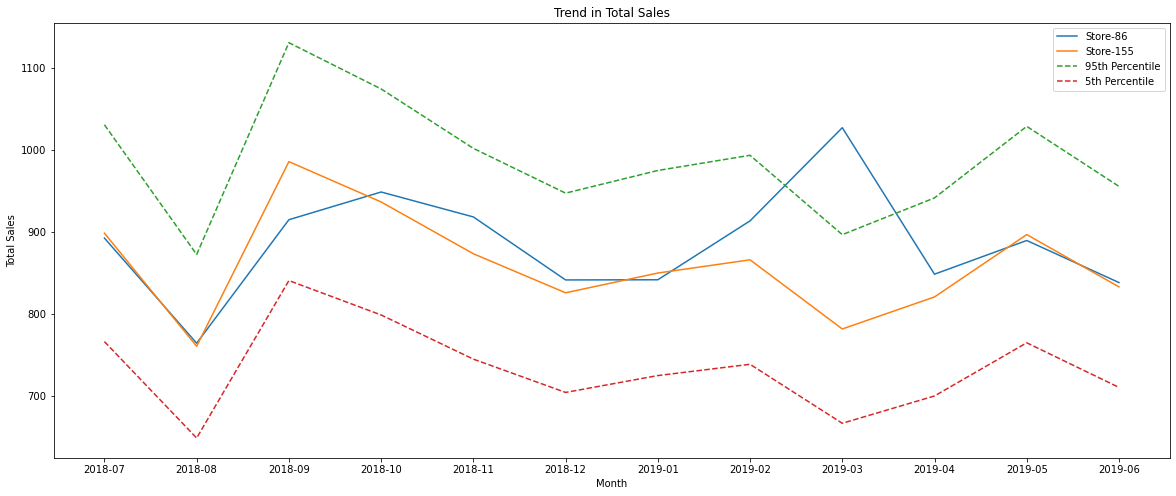

In [29]:
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 86].T, label='Store-86')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 155].multiply(scale_factor_sales_86).T, label='Store-155')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 155].multiply(scale_factor_sales_86).T*(1 + sample_std_86 * 2), '--', label='95th Percentile')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 155].multiply(scale_factor_sales_86).T*(1 - sample_std_86 * 2), '--', label='5th Percentile')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend()
plt.title('Trend in Total Sales')

Text(0.5, 1.0, 'Trend in Total Sales')

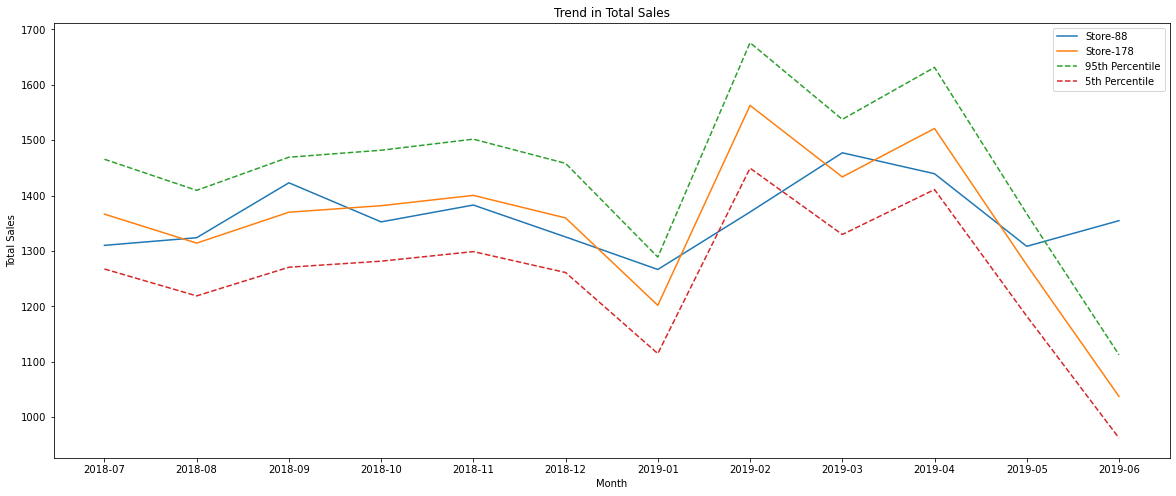

In [30]:
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 88].T, label='Store-88')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 178].multiply(scale_factor_sales_88).T, label='Store-178')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 178].multiply(scale_factor_sales_88).T*(1 + sample_std_88 * 2), '--', label='95th Percentile')
plt.plot(total_sales_monthly.columns.astype(str), total_sales_monthly[total_sales_monthly.index == 178].multiply(scale_factor_sales_88).T*(1 - sample_std_88 * 2), '--', label='5th Percentile')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend()
plt.title('Trend in Total Sales')

### For Number of Customers

### Sample Mean

In [31]:
sample_mean_77 = 100*((customers_monthly[customers_monthly.index == 77].iloc[:, 7:10].subtract(customers_monthly[customers_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_customers_77).values)).divide(customers_monthly[customers_monthly.index == 119].iloc[:, 7:10].multiply(scale_factor_customers_77).values)).values.mean()
sample_mean_86 = 100*((customers_monthly[customers_monthly.index == 86].iloc[:, 7:10].subtract(customers_monthly[customers_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_customers_86).values)).divide(customers_monthly[customers_monthly.index == 155].iloc[:, 7:10].multiply(scale_factor_customers_86).values)).values.mean()
sample_mean_88 = 100*((customers_monthly[customers_monthly.index == 88].iloc[:, 7:10].subtract(customers_monthly[customers_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_customers_88).values)).divide(customers_monthly[customers_monthly.index == 178].iloc[:, 7:10].multiply(scale_factor_customers_88).values)).values.mean()

### Population Mean

In [32]:
population_mean_77 = 100*((customers_monthly[customers_monthly.index == 77].subtract(customers_monthly[customers_monthly.index == 119].multiply(scale_factor_customers_77).values)).divide(customers_monthly[customers_monthly.index == 119].multiply(scale_factor_customers_77).values)).values.mean()
population_mean_86 = 100*((customers_monthly[customers_monthly.index == 86].subtract(customers_monthly[customers_monthly.index == 155].multiply(scale_factor_customers_86).values)).divide(customers_monthly[customers_monthly.index == 155].multiply(scale_factor_customers_86).values)).values.mean()
population_mean_88 = 100*((customers_monthly[customers_monthly.index == 88].subtract(customers_monthly[customers_monthly.index == 178].multiply(scale_factor_customers_88).values)).divide(customers_monthly[customers_monthly.index == 178].multiply(scale_factor_customers_88).values)).values.mean()

### Standard Deviation of the Sample

In [33]:
sample_std_77 = (((customers_monthly[customers_monthly.index == 77].subtract(customers_monthly[customers_monthly.index == 119].multiply(scale_factor_customers_77).values)).divide(customers_monthly[customers_monthly.index == 119].multiply(scale_factor_customers_77).values)).values.std())/sqrt(3)
sample_std_86 = (((customers_monthly[customers_monthly.index == 86].subtract(customers_monthly[customers_monthly.index == 155].multiply(scale_factor_customers_86).values)).divide(customers_monthly[customers_monthly.index == 155].multiply(scale_factor_customers_86).values)).values.std())/sqrt(3)
sample_std_88 = (((customers_monthly[customers_monthly.index == 88].subtract(customers_monthly[customers_monthly.index == 178].multiply(scale_factor_customers_88).values)).divide(customers_monthly[customers_monthly.index == 178].multiply(scale_factor_customers_88).values)).values.std())/sqrt(3)

### t - Values

In [34]:
print('For Store-77, the t-value is: ')
print((sample_mean_77 - population_mean_77)/sample_std_77)

print('------------------------------')

print('For Store-86, the t-value is: ')
print((sample_mean_86 - population_mean_86)/sample_std_86)

print('------------------------------')

print('For Store-88, the t-value is: ')
print((sample_mean_88 - population_mean_88)/sample_std_88)

print('------------------------------')

For Store-77, the t-value is: 
67.37760721278178
------------------------------
For Store-86, the t-value is: 
252.42727223617075
------------------------------
For Store-88, the t-value is: 
-213.38038303176336
------------------------------


The t-distribution for the 95th percentage for degree of freedom = 2 is 2.919986. We can see that the t-value for the stores 77 and 86 are significantly greater than the t-distribution. Visualizing the above. 

Text(0.5, 1.0, 'Trend in Number of Customers')

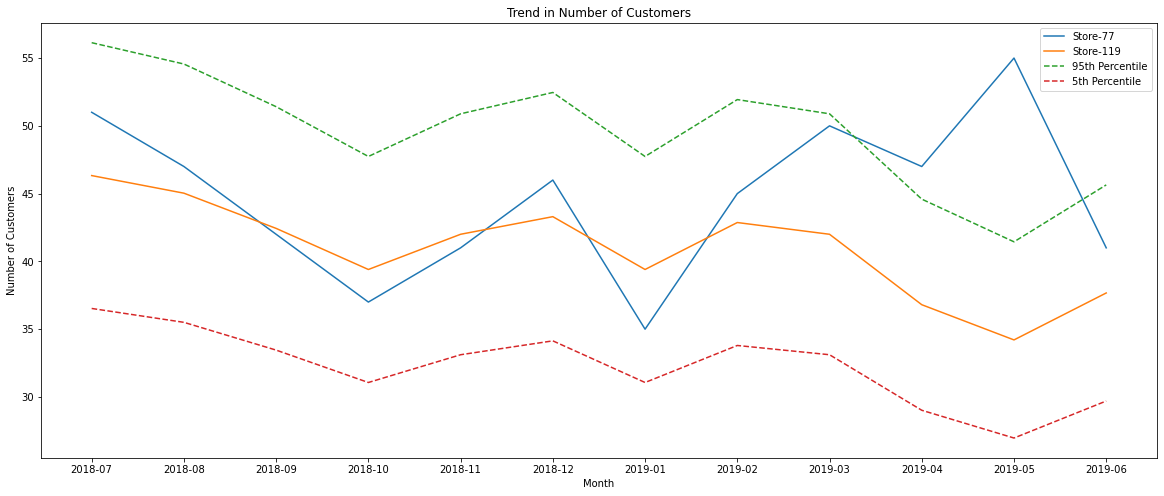

In [35]:
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 77].T, label='Store-77')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 119].multiply(scale_factor_customers_77).T, label='Store-119')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 119].multiply(scale_factor_customers_77).T*(1 + sample_std_77 * 2), '--', label='95th Percentile')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 119].multiply(scale_factor_customers_77).T*(1 - sample_std_77 * 2), '--', label='5th Percentile')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.xlabel('Month')
plt.legend()
plt.title('Trend in Number of Customers')

Text(0.5, 1.0, 'Trend in Number of Customers')

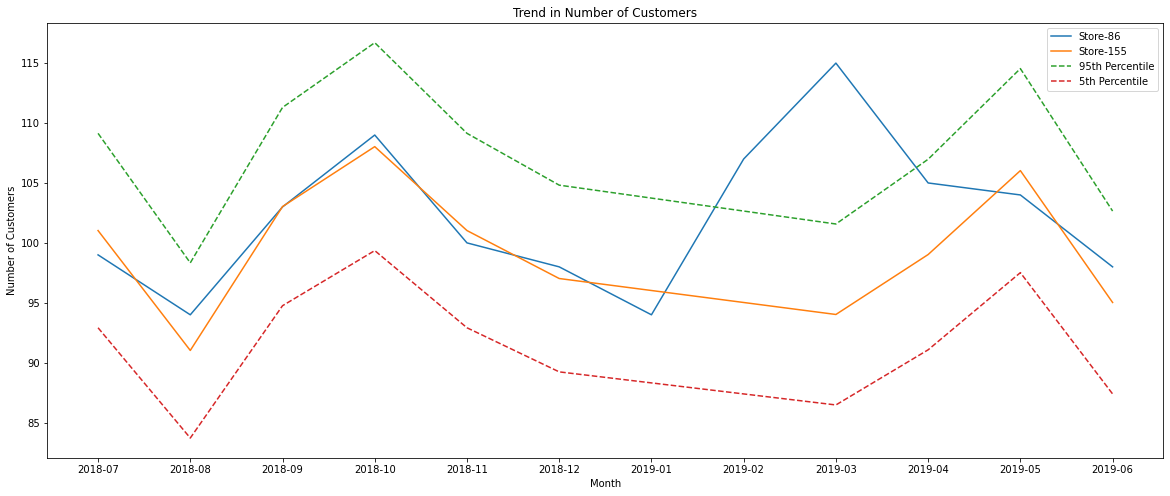

In [36]:
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 86].T, label='Store-86')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 155].multiply(scale_factor_customers_86).T, label='Store-155')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 155].multiply(scale_factor_customers_86).T*(1 + sample_std_86 * 2), '--', label='95th Percentile')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 155].multiply(scale_factor_customers_86).T*(1 - sample_std_86 * 2), '--', label='5th Percentile')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.xlabel('Month')
plt.legend()
plt.title('Trend in Number of Customers')

Text(0.5, 1.0, 'Trend in Number of Customers')

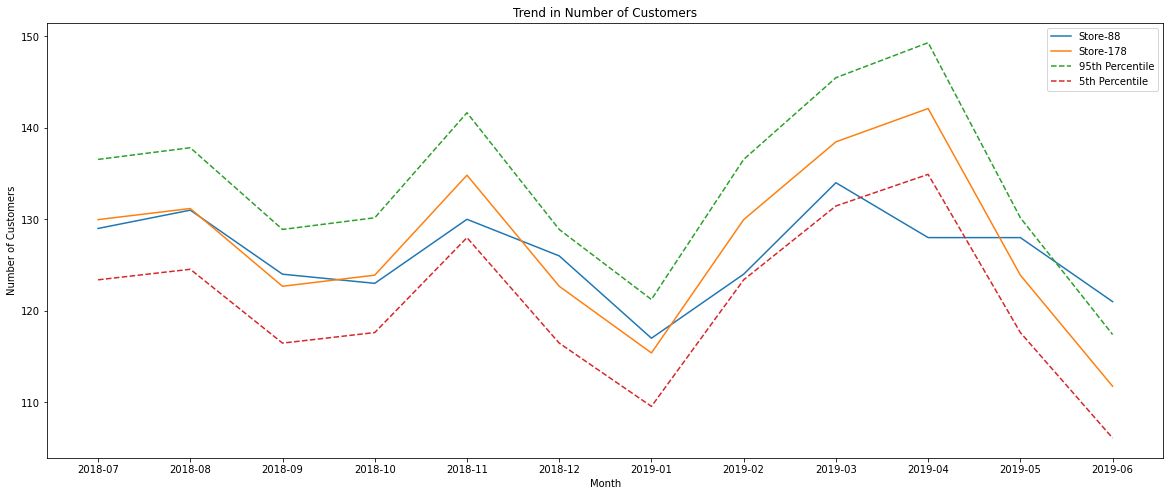

In [37]:
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 88].T, label='Store-88')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 178].multiply(scale_factor_customers_88).T, label='Store-178')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 178].multiply(scale_factor_customers_88).T*(1 + sample_std_88 * 2), '--', label='95th Percentile')
plt.plot(customers_monthly.columns.astype(str), customers_monthly[customers_monthly.index == 178].multiply(scale_factor_customers_88).T*(1 - sample_std_88 * 2), '--', label='5th Percentile')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.xlabel('Month')
plt.legend()
plt.title('Trend in Number of Customers')

# Conclusion

The trial stores 77 and 86 show an increase in sales and number of customers during the trial period whereas the store 88 shows a decrease in the same during the said period. 